# Bai tap thuc hanh Ex2_Classification_MNIST_LogisticRegression

## Digits Classification using Logistic Regression

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import numpy as np

## MNIST Dataset
The MNIST database of handwritten digits is built for a task of classifying 10 digits from 0 to 9. This original
dataset includes a training set of 60,000 examples, and a test set of 10,000 examples. The images were
centered in a 28x28 image. However , in this experiments, you are provided a subset of this dataset where the
images are resized to 8x8 and the number of samples are reduced to 1798 samples. This subset is available in
Scikit-Learn package. Y ou can download it by using the following codes:

In [2]:
digits = datasets.load_digits()
n_samples = len(digits.images)
print('The number of samples:', n_samples)

The number of samples: 1797


In [3]:
print('Shape of digit samples:', digits.images.shape)

Shape of digit samples: (1797, 8, 8)


Firstly , you need to understand the dataset by visualizing several samples.

In [4]:
def display_digits(X, Y):
    fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
    fig.suptitle( "Display randomly images of the training data set")
    for i in range(5):
        for j in range(5):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind, :]# .reshape(8, 8)
            ax[i,j].set_title("Label: {}".format(Y[ind]))
            ax[i,j].imshow(tmp, cmap='gray_r')
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

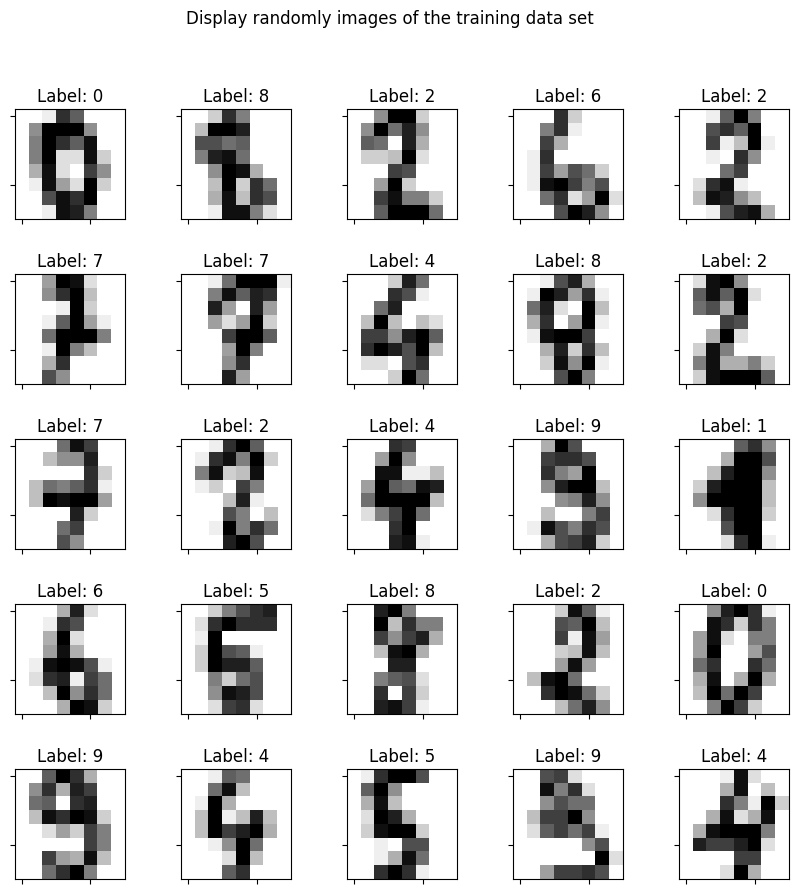

In [5]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(digits.images,
                                                    digits.target,
                                                    test_size=0.2,
                                                    random_state=200,
                                                    shuffle=False)
display_digits(X_train, y_train)

As the digits data set contains 8x8 features, this might be a challenging task. It is tough to understand the
structure and keep the overview of the digits data. In addition, the data with only two or three dimensions are
easier to grasp and can also be visualized easily . That all explains why you’re going to visualize the data with the
help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea
in PCA is to find a linear combination of the two variables that contains most of the information. This new
variable or “principal component” can replace the two original variables.

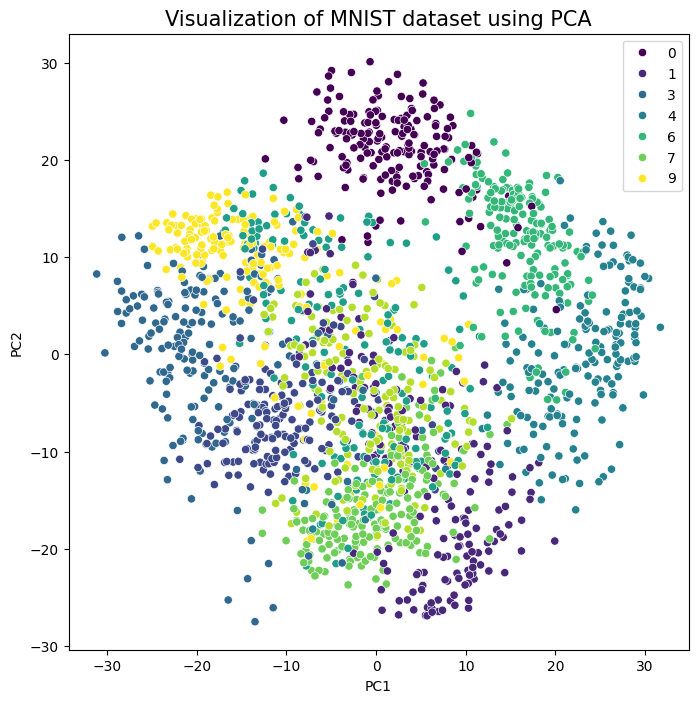

In [6]:
from sklearn.decomposition import PCA
# Create a Randomized PCA model that takes two components
pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_rpca = pca.fit_transform(digits.data)

# Create a regular PCA model 
pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)
plt.figure(figsize=(8, 8))
_ = sns.scatterplot(x=reduced_data_pca[:, 0],
                    y=reduced_data_pca[:, 1],
                    hue=digits.target,
                    palette='viridis')
_ = plt.xlabel('PC1')
_ = plt.ylabel('PC2')
_ = plt.title('Visualization of MNIST dataset using PCA', {'fontsize'
: 15}) 

## Modeling and Results
Before applying a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale
values from shape (8, 8) into shape (64,). Subsequently , the entire dataset will be of shape (n_samples,
n_features), where n_samples is the number of images and n_features is the total number of pixels in each
image.

In [7]:
# Flatten the images
X_train = X_train.reshape((len(X_train), -1))
X_test = X_test.reshape((len(X_test), -1))

In [8]:
# ===========================
# Create a classifier here
# Example: This example, we use Logistic Regressor
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2',
                         fit_intercept=True,
                         random_state=2021,
                         solver='lbfgs',
                         max_iter=100,
                         verbose=1,
                         n_jobs=5,)

In [9]:
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


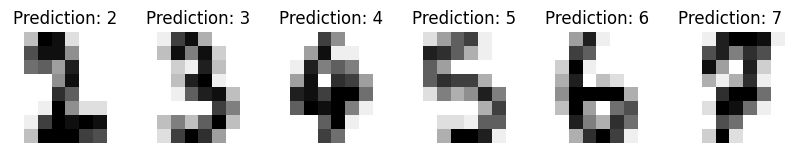

In [10]:
# Show predictions
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

## Model Evaluation
Evaluation of your model’s performance is a crutial step to help you investigate your model. In other words, you
will analyze the degree of correctness of the model’s predictions. In this case, accuracy is the main metric and
can be used as the following codes:

In [11]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier LogisticRegression(n_jobs=5, random_state=2021, verbose=1):
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.79      0.83      0.81        36
           2       1.00      1.00      1.00        35
           3       0.93      0.76      0.84        37
           4       0.94      0.92      0.93        37
           5       0.90      0.95      0.92        37
           6       0.97      0.97      0.97        37
           7       0.97      0.94      0.96        36
           8       0.78      0.85      0.81        33
           9       0.80      0.89      0.85        37

    accuracy                           0.91       360
   macro avg       0.91      0.91      0.91       360
weighted avg       0.91      0.91      0.91       360




Our model's accuracy is 91% on the the testing set. We can further investigate the results by using Confusion
Matrix.

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

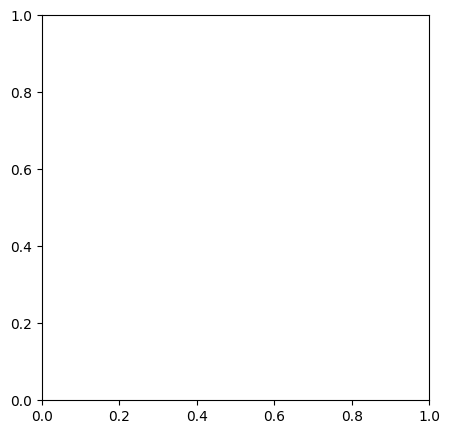

In [14]:
plt.figure(figsize=(5, 5))
ax = plt.gca()
disp = metrics.plot_confusion_matrix(clf, X_test, y_test, ax=ax)
_ = disp.figure_.suptitle("Confusion Matrix", fontsize=15)

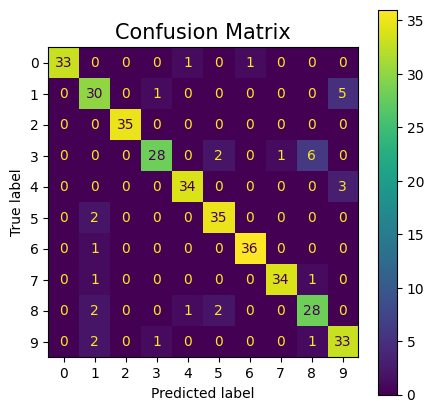

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(5, 5))
ax = plt.gca()
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=ax)
disp.ax_.set_title("Confusion Matrix", fontsize=15)
plt.show()

Our model can predict most of digits correcly. However , some samples are wrongly predicted which are shown in
the figure.

# END